In [1]:
import numpy as np
import matplotlib.pyplot as plt
import preprocess

In [2]:
SGY_PATH = 'data/R1809SA8S299.sgy'
NUMPY_SAVE_PATH = 'data/data.npy'

NUM_SHOTS = 3
RECEIVERS_PER_LINE= 638 
NUM_LINES = 8 

data,DELTA_T,_ = preprocess.read_segy(SGY_PATH)
source_idxs = preprocess.get_source_indices(NUM_SHOTS,NUM_LINES,RECEIVERS_PER_LINE)

# source data (from shot 1)
source1_signal = preprocess.get_source_signal(data,shot_no=0,soure_indices=source_idxs)
print(f'source_1_signal_shape = {source1_signal.shape}')

# receiver line 1 data (from shot 1)
receiver_line_1 = preprocess.get_receiver_line_data(data,shot_no=0,line_no=0,soure_indices=source_idxs,num_lines=NUM_LINES)
print(f'receiver_line_10_shape = {receiver_line_1.shape}')

No of traces = 15315, No of samples per trace = 3200
source_1_signal_shape = (3200,)
receiver_line_10_shape = (638, 3200)


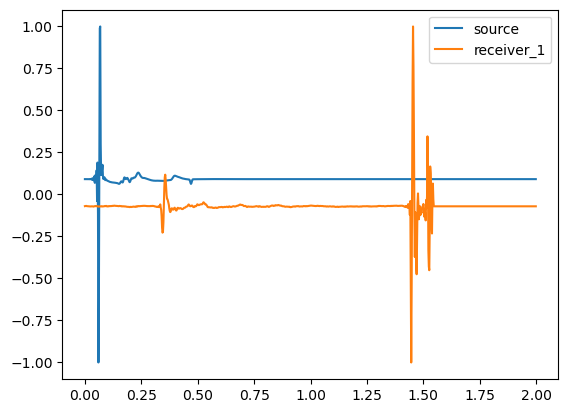

In [3]:
# visualize source and receiver 0 signals (from line1)
time = preprocess.get_time(data,delta_t=DELTA_T)/1000 # time in seconds
t_cut = 2 
t_mask = time<t_cut
plt.plot(time[t_mask],preprocess.min_max_normalize(source1_signal[t_mask]),label='source')
plt.plot(time[t_mask],preprocess.min_max_normalize(receiver_line_1[0][t_mask]),label='receiver_1')
#plt.xlim([0,0.5])
plt.legend()

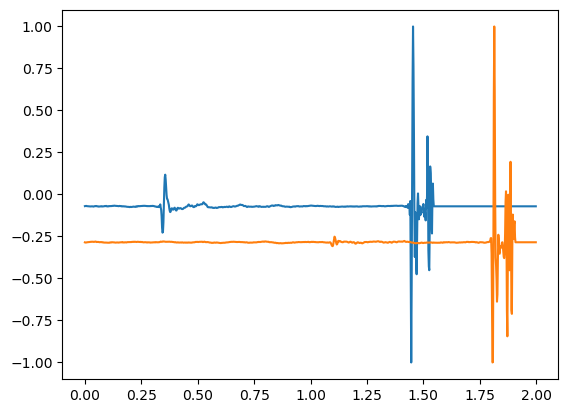

In [4]:
# plot 2 receiver signals 
plt.plot(time[t_mask],preprocess.min_max_normalize(receiver_line_1[0][t_mask]))
plt.plot(time[t_mask],preprocess.min_max_normalize(receiver_line_1[100][t_mask]))

In [5]:
# get the normalized cross correlation
def cross_correlate(signal_1,signal_2):
    signal_1 = signal_1 - np.mean(signal_1)
    signal_2 = signal_2 - np.mean(signal_2)
    corr = np.correlate(signal_1, signal_2,mode='full')
    denmonitor = np.sqrt(np.dot(signal_1,signal_1)) * np.sqrt(np.dot(signal_2,signal_2))
    cross_corr_normalized = corr/denmonitor
    return  cross_corr_normalized

In [6]:
# get arrival time stamps 
def time_of_arrival(receiver_signal,source_signal,correation_threshold=0.1):
    lags = np.arange(-len(receiver_signal)+1,len(receiver_signal))
    corr = cross_correlate(receiver_signal,source_signal)
    selected_lags = lags[corr> correation_threshold]
    time = preprocess.get_time(data,delta_t=DELTA_T)/1000
    time_resolution = (time[-1]-time[0])/len(time)
    return selected_lags * time_resolution

In [7]:
time_of_arrival(receiver_signal=receiver_line_1[0],source_signal=source1_signal)

array([0.28391125, 0.28591062, 0.28791   , 1.3835675 , 1.38556687,
       1.38756625, 1.38956562, 1.40756   , 1.40955937, 1.44954687,
       1.45154625, 1.46154312, 1.4635425 , 1.46554187])